In [99]:
import pandas as pd
import matplotlib as mlp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
trainingdf = pd.read_csv('/Users/florencecornelissen/Documents/VU/DMT/DMT2023_ass2/data/training_set_VU_DM.csv')

In [49]:
trainingdf.nunique()

srch_id                        199795
date_time                      198615
site_id                            34
visitor_location_country_id       210
visitor_hist_starrating           312
visitor_hist_adr_usd             7799
prop_country_id                   172
prop_id                        129113
prop_starrating                     6
prop_review_score                  10
prop_brand_bool                     2
prop_location_score1              337
prop_location_score2             9342
prop_log_historical_price         392
position                           40
price_usd                       76465
promotion_flag                      2
srch_destination_id             18127
srch_length_of_stay                36
srch_booking_window               429
srch_adults_count                   9
srch_children_count                10
srch_room_count                     8
srch_saturday_night_bool            2
srch_query_affinity_score      199387
orig_destination_distance      530595
random_bool 

In [12]:
print('number of columns:', len(trainingdf.columns))
print('number of rows:', len(trainingdf.index))
print('number of unique ids:', trainingdf['srch_id'].nunique())

number of columns: 54
number of rows: 4958347
number of unique ids: 199795


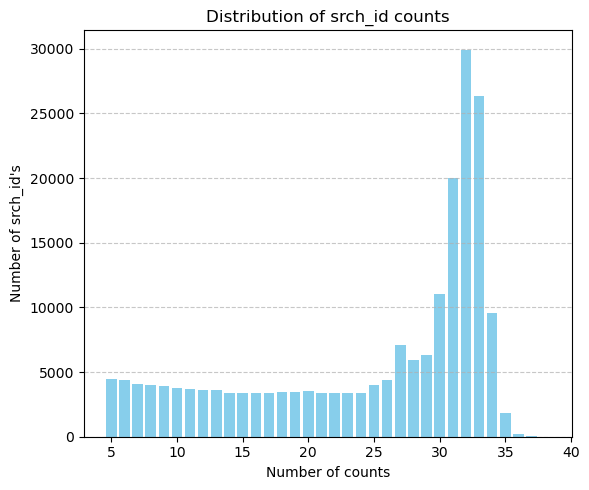

In [143]:
# trainingdf.groupby('srch_id')['click_bool'].count()
counts = trainingdf['srch_id'].value_counts()
count_values = counts.value_counts()

plt.figure(figsize=(6,5))
plt.bar(count_values.index, count_values.values, color='skyblue')
plt.xlabel('Number of counts')
plt.ylabel('Number of srch_id\'s')
plt.title('Distribution of srch_id counts')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust the spacing
plt.show()
#make a distribution plot with ontly the counts of the srch_id's. On the x-axis the number of counts and on the y-axis the number of srch_id's with that count


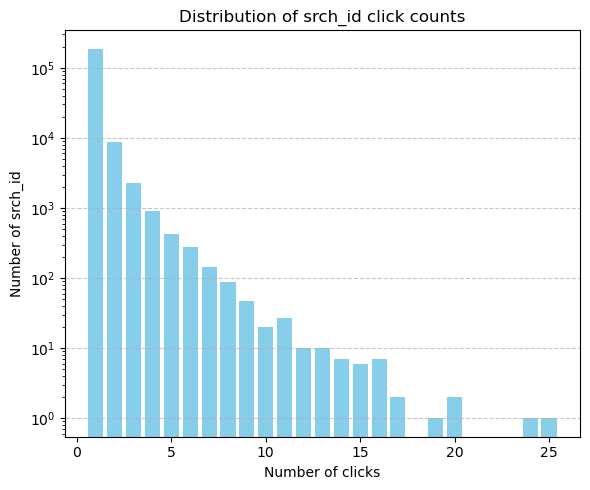

In [142]:
countclick = trainingdf[trainingdf['click_bool']==1].groupby('srch_id').size()

plt.figure(figsize=(6, 5))  # Adjust the figure size as needed

plt.bar(countclick_values.index, countclick_values.values, color='skyblue')
plt.xlabel('Number of clicks')
plt.ylabel('Number of srch_id')
plt.title('Distribution of srch_id click counts')

# Customize the grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yscale('log')
plt.tight_layout()  # Adjust the spacing
plt.show()

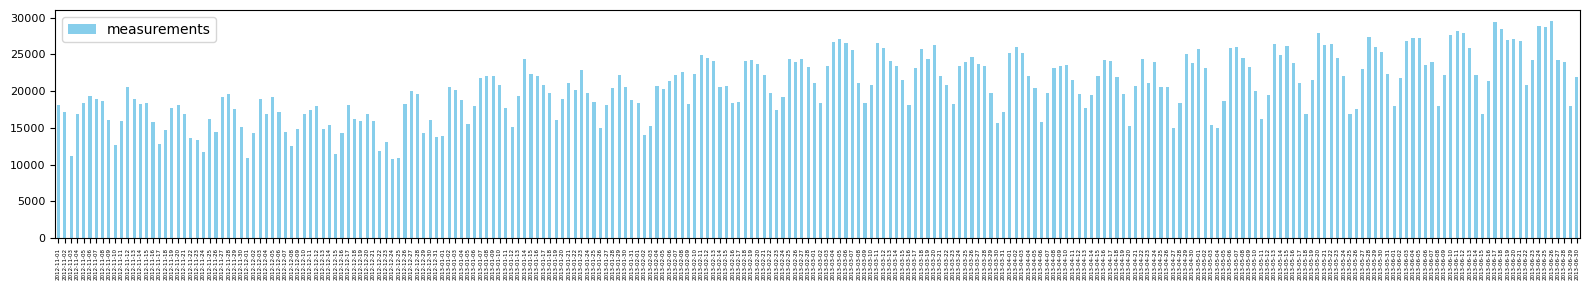

In [139]:
timespan = pd.to_datetime(trainingdf['date_time']).dt.date.value_counts()
timespanbar = timespan.to_frame()
timespanbar = timespanbar.sort_index()

timespanbar = timespanbar.rename(columns={timespanbar.columns[0]: 'measurements'})
# plt.xticks(fontsize=3)
# plt.yticks(fontsize=8)
# plt.figsize=(16,3)
# plt.bar(timespanbar.index, timespanbar['measurements'], color='grey')
# plt.show()
barplottime = timespanbar.plot(figsize=(16,3), fontsize=3, kind='bar', color='skyblue')
barplottime.tick_params(axis='y', labelsize=8)

# Set the font size for y-axis ticks
barplottime.tick_params(axis='x', labelsize=4)
plt.tight_layout()  # Adjust the spacing
plt.show()


In [27]:
pd.to_datetime(trainingdf['date_time']).dt.date.value_counts()
# pd.to_datetime(trainingdf['date_time']).dt.date.nunique()

2013-06-26    29551
2013-06-17    29365
2013-06-24    28844
2013-06-25    28695
2013-06-18    28465
              ...  
2012-12-15    11391
2012-11-03    11134
2012-12-01    10974
2012-12-25    10932
2012-12-24    10738
Name: date_time, Length: 242, dtype: int64

In [34]:
begin = pd.to_datetime(trainingdf['date_time']).dt.date.min()
end = pd.to_datetime(trainingdf['date_time']).dt.date.max()
delta = begin - end
print(begin)
print(end)
print(delta.days) #answer is +1 since day itself counts as well (see above)

2012-11-01
2013-06-30
-241


In [125]:
#Cumulative sum of the click_bool per srch_id
trainingdf['click_history'] = trainingdf.groupby('srch_id')['click_bool'].transform(lambda x: x.cumsum())


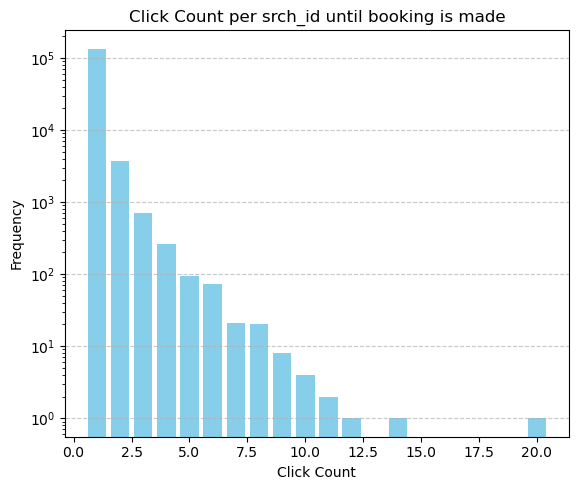

In [126]:
#Remove rows which have a booking_bool of 0
trainingdfnew = trainingdf[trainingdf['booking_bool'] == 1]
# trainingdfnew
#Create a bar plot of the click_history
plt.figure(figsize=(6, 5))
plt.xlabel('Click Count')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Click Count per srch_id until booking is made')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust the spacing
plt.bar(trainingdfnew['click_history'].value_counts().sort_index().index, trainingdfnew['click_history'].value_counts().sort_index().values, color='skyblue')
plt.show()
# trainingdfnew['click_history'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='gray')


In [ ]:
#Bar plot of the number of clicks on the x-axis and the number of srch_id on the y-axis
trainingdf.groupby('srch_id')['click_bool']

In [132]:
ones = len(trainingdfnew[trainingdfnew['click_history'] == 1])
more = len(trainingdfnew['click_history'])
ones/ (ones + more) * 100

49.10448310102608

In [46]:
q_low = int(trainingdf["price_usd"].quantile(0.001))
q_hi  = int(trainingdf["price_usd"].quantile(0.999))

print(q_low, q_hi)


14 2060


(array([1.49560e+04, 3.19610e+04, 7.80310e+04, 1.78974e+05, 2.59676e+05,
        2.99504e+05, 3.34130e+05, 3.49453e+05, 3.56561e+05, 3.20270e+05,
        2.95518e+05, 2.67573e+05, 2.38933e+05, 2.03981e+05, 1.79916e+05,
        1.59102e+05, 1.43192e+05, 1.24694e+05, 1.23908e+05, 9.21940e+04,
        8.22740e+04, 7.91300e+04, 6.59730e+04, 6.52040e+04, 5.46070e+04,
        4.96710e+04, 4.39040e+04, 3.84360e+04, 4.34030e+04, 3.04840e+04,
        2.67750e+04, 2.68200e+04, 2.15760e+04, 2.25780e+04, 1.98310e+04,
        1.72040e+04, 1.48220e+04, 1.49490e+04, 1.64900e+04, 1.11740e+04,
        1.10150e+04, 9.79200e+03, 8.54600e+03, 9.01100e+03, 7.41100e+03,
        6.80600e+03, 6.01800e+03, 6.70700e+03, 7.11800e+03, 4.52700e+03,
        4.82000e+03, 3.90400e+03, 3.88100e+03, 3.77100e+03, 2.97700e+03,
        2.92500e+03, 2.70100e+03, 2.98100e+03, 3.14200e+03, 1.93200e+03,
        2.13600e+03, 1.91200e+03, 1.76300e+03, 1.75500e+03, 1.47400e+03,
        1.74400e+03, 1.28200e+03, 1.49900e+03, 1.46

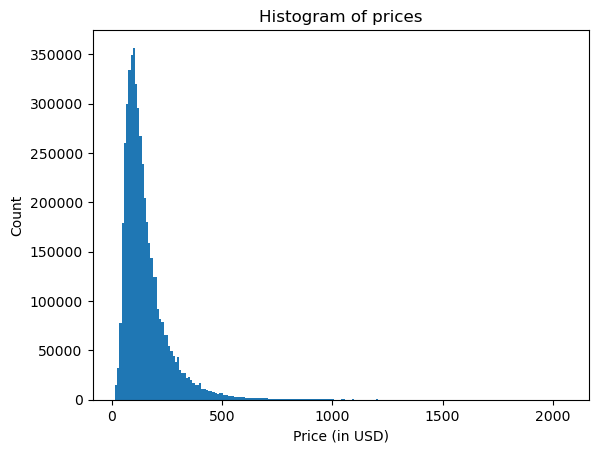

In [52]:
plt.xlabel('Price (in USD)')
plt.ylabel('Count')
plt.title('Histogram of prices')
plt.hist(trainingdf['price_usd'], bins=int((q_hi-q_low)/10), range=(q_low,q_hi))

In [117]:
trainingdf['price_per_night'] = trainingdf['price_usd'] / trainingdf['srch_length_of_stay']

In [118]:
q_lownight = int(trainingdf["price_per_night"].quantile(0.001))
q_hinight  = int(trainingdf["price_per_night"].quantile(0.999))

(array([1.26892e+05, 3.23378e+05, 4.22057e+05, 4.30157e+05, 4.27800e+05,
        4.00981e+05, 3.69751e+05, 3.18289e+05, 2.92877e+05, 2.74957e+05,
        2.23559e+05, 1.92656e+05, 1.64791e+05, 1.34129e+05, 1.22160e+05,
        9.59520e+04, 8.02100e+04, 6.95190e+04, 5.81130e+04, 5.87380e+04,
        4.03540e+04, 3.32790e+04, 3.30190e+04, 2.65670e+04, 2.61840e+04,
        2.08770e+04, 1.88590e+04, 1.57960e+04, 1.34800e+04, 1.69650e+04,
        9.95100e+03, 9.07400e+03, 9.21700e+03, 7.07400e+03, 7.55200e+03,
        6.15200e+03, 5.11400e+03, 5.02400e+03, 4.09500e+03, 6.84100e+03,
        3.17600e+03, 3.03200e+03, 3.41600e+03, 2.31100e+03, 3.14700e+03,
        2.05800e+03, 1.76500e+03, 2.03600e+03, 1.66300e+03, 3.25000e+03,
        1.23300e+03, 1.23500e+03, 1.37400e+03, 1.06100e+03, 1.35700e+03,
        8.35000e+02, 7.54000e+02, 8.59000e+02, 6.60000e+02, 1.33800e+03,
        5.99000e+02, 4.33000e+02, 6.63000e+02, 4.50000e+02, 6.21000e+02,
        4.42000e+02, 4.65000e+02, 4.29000e+02, 3.07

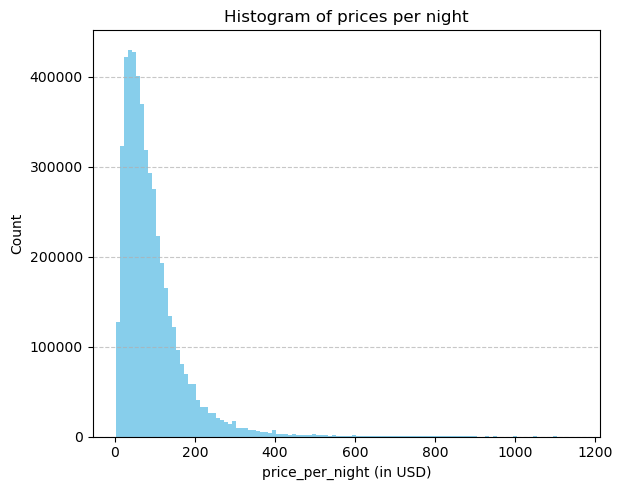

In [120]:
plt.figure(figsize=(6,5))
plt.xlabel('price_per_night (in USD)')
plt.ylabel('Count')
plt.title('Histogram of prices per night')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust the spacing
plt.hist(trainingdf['price_per_night'], bins=int((q_hinight-q_lownight)/10), range=(q_lownight,q_hinight), color='skyblue')

In [101]:
trainingdf['date_time'] = pd.to_datetime(trainingdf['date_time'])
trainingdf['weekday_name'] = trainingdf['date_time'].dt.day_name()
trainingdf['weekday_name'].value_counts()

Wednesday    784298
Monday       769706
Tuesday      768196
Thursday     745478
Friday       681372
Sunday       660820
Saturday     548477
Name: weekday_name, dtype: int64

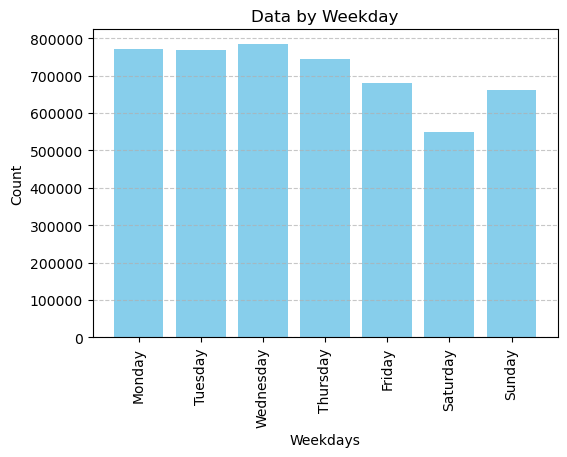

In [115]:
# Sample data
x = ['Wednesday', 'Monday', 'Tuesday', 'Thursday', 'Friday', 'Sunday', 'Saturday']
y = [784298, 769706, 768196, 745478, 681372, 660820, 548477]
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorted_data = sorted(zip(x, y), key=lambda d: weekday_order.index(d[0]))
x_sorted, y_sorted = zip(*sorted_data)
plt.figure(figsize=(6,4))
plt.bar(x_sorted, y_sorted, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Weekdays')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Data by Weekday')
plt.show()


In [124]:
trainingdf['prop_location_score1'].describe()
# trainingdf['prop_location_score2'].describe()

count    4.958347e+06
mean     2.872589e+00
std      1.531011e+00
min      0.000000e+00
25%      1.790000e+00
50%      2.770000e+00
75%      4.040000e+00
max      6.980000e+00
Name: prop_location_score1, dtype: float64